<h2>OpenCV를 활용한 컴퓨터 비전 Week1 황준서 </h2> 
<h3>라플라시안(Laplacian) / LoG(Laplacian of Gaussian) / 컴퓨터 비전의 현업에서의 활용</h3>

<h3>#1 라플라시안 Laplacian</h3><br>

<h4>원리</h4>

    라플라스 연산자 Δ : 2차 미분 연산자로 기울기의 발산

    이 라플라스 연산자를 사용하면, 벡터의 흐름, 즉 벡터장을 얻을 수 있는데, 이런 벡터장들이 발산하는 지점을 찾으면 에지 검출이 가능하다.

![img](./img/lap&log/opencvlap.png)

    OpenCV의 공식 문서를 참고하면 다음과 같은 공식과 필터를 이용해 라플라스 연산자를 계산하는 것을 볼 수 있다.
    
<br><h4>특징</h4>

    º 2차 미분을 활용하기에 타 에지 검출보다 더 정밀한 검출이 가능함.
    º 예민하기 때문에 타 방식에 비해서 샤프하게 검출이 됨
    º 발산을 활용한다는 점 때문에 밝기가 서서히 변하는 에지에 대해서는 반응하지 않음
    
<br><h4>사용법</h4>
![img](./img/lap&log/opencvlaparg.png)<br>
        
        OpenCV에서는 cv.Laplacian()함수를 통해 라플라시안을 지원하고 있으며, 이 함수는 위 사진의 인수들을 조절 할수 있다.

    grayScale된 이미지를 인수를 넣고 위 사진의 파라미터들을 조정해주면 된다.

    사용 예) cv2.Laplacian(Source image(원본 이미지),ddepth(정밀도))

    *참고하면 좋은 사이트

    https://micropilot.tistory.com/2970

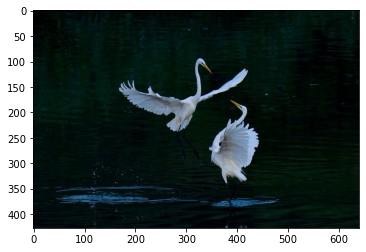

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./img/lap&log/week1.jpg',cv2.IMREAD_COLOR)

#라플라시안을 적용할 예시 이미지
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [2]:
#이미지 출력용 함수
def two_img_show(fir_img,fir_name,sec_img,sec_name):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(fir_img, cv2.COLOR_BGR2RGB))
    ax1.set_title(fir_name)
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(sec_img, cv2.COLOR_BGR2RGB))
    ax2.set_title(sec_name)
    ax2.axis("off")

    plt.show()

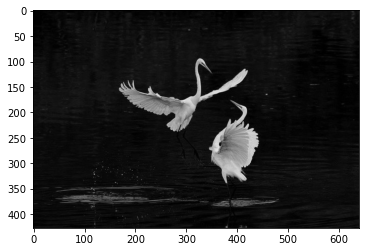

In [3]:
#라플라시안 적용 전 우선적으로 이미지를 GrayScale로 변환

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

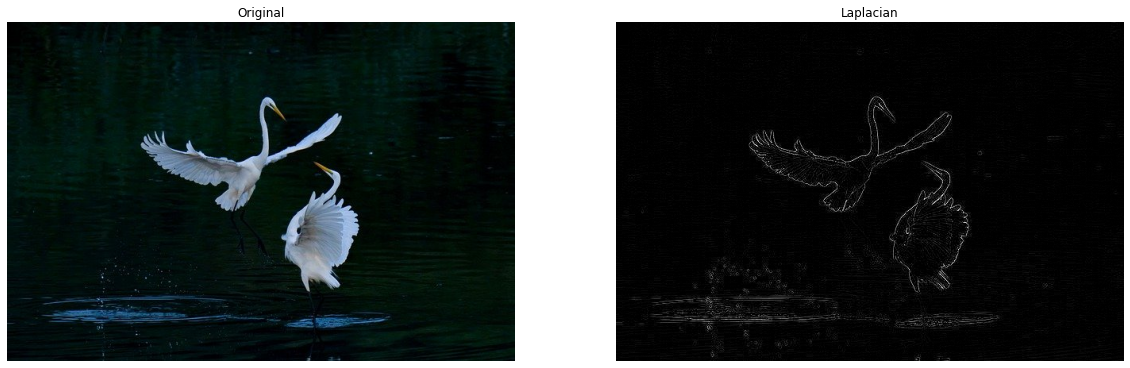

In [4]:
# OpenCV의 cv2.Laplacian 사용
# cv2.Laplacian(Source image(원본 이미지),ddepth(정밀도))

laplacian_img = cv2.Laplacian(gray_img,-1)
two_img_show(img,'Original',laplacian_img,'Laplacian')

<h3>#2 LoG Laplacian of Gaussian</h3><br>
<h4>원리</h4>

    가우시안 블러를 적용한 후, 라플라시안을 적용하는 방법.
    기존 라플라시안이 잡음에 민감하기 때문에, 이를 해결하기 위해 가우시안 블러를 적용한 LoG가 생겼음

<h5>*가우시안 블러란?</h5>

    노이즈를 가장 쉽게 제거하는 것은 영상을 흐리게 만드는 것임
    노이즈를 제거할 수 있는 방법으로 거리에 따른 가중치를 이용하며, 마스크의 크기는 표준 편차에 따라 자동으로 설정한다.
    즉 중앙값은 가중치를 주고, 주변은 더 흐리게 만드는 방식.
    
<h4>특징</h4>

    º blob 검출에 용이함
    º 라플라시안에 비해 민감도가 낮음

<br><h4>사용법</h4>

![img](./img/lap&log/opencvGau.png)<br>

    가우시안 블러에서 사용가능한 인자들은 위 사진과 같으며, 
    grayScale된 이미지에 가우시안 블러를 적용하고, 라플라시안을 사용하면 된다.

    사용 예)
    cv2.GaussianBlur(Source image(원본 이미지), ksize(커널 사이즈, (0, 0)으로 하면 표준편차에 따라 자동 결정), 
    sigma(표준편차))

In [5]:
#앞에서 사용한 이미지를 재사용, 마찬가지로 Grayscale로 변환
img2 = cv2.imread('./img/lap&log/week1.jpg',cv2.IMREAD_COLOR)
gray_img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

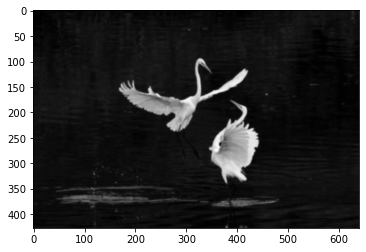

In [6]:
#가우시안 블러 적용
#cv2.GaussianBlur(Source image(원본 이미지), ksize(커널 사이즈, (0, 0)으로 하면 표준편차에 따라 자동 결정, 
#sigma(표준편차))
gaussianblur_img = cv2.GaussianBlur(gray_img2, (0, 0), 1)
plt.imshow(gaussianblur_img, cmap='gray')

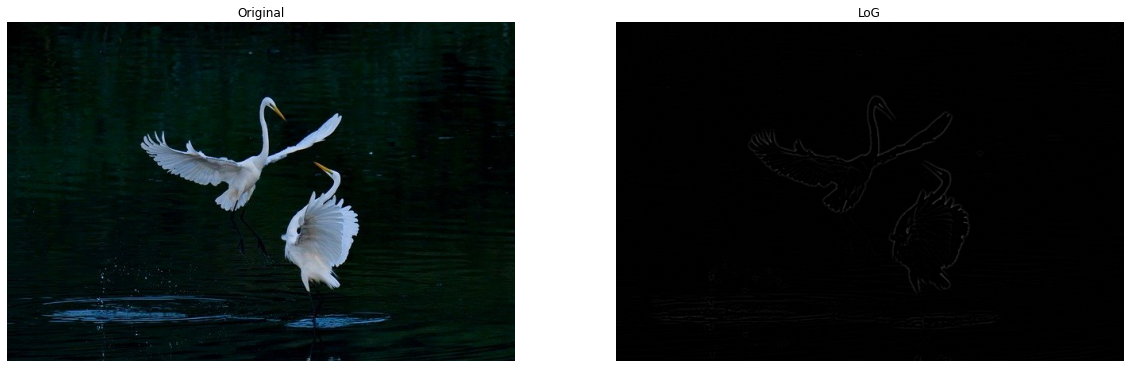

In [7]:
#가우시안 블러를 적용한 이미지에 라플라시안 적용
log_img = cv2.Laplacian(gaussianblur_img,-1)
two_img_show(img,'Original',log_img,'LoG')

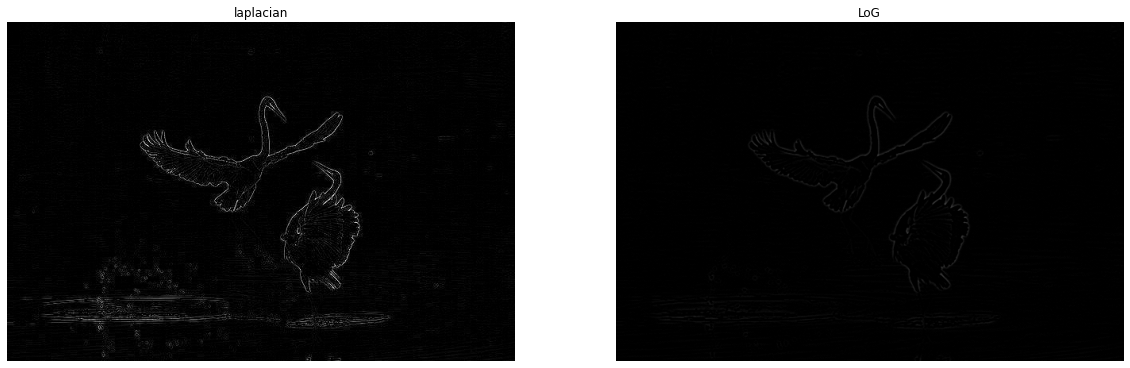

In [8]:
#라플라시안과 LoG 비교
two_img_show(laplacian_img,'laplacian',log_img,'LoG')